In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

In [116]:
df= pd.read_csv(r'C:\Users\user\Downloads\insurance_part2_data.csv')

In [117]:
df.head(10)

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product_Name,Destination
0,48,C2B,Airlines,No,0.70,Online,7,2.51,Customised Plan,ASIA
1,36,EPX,Travel Agency,No,0.00,Online,34,20.00,Customised Plan,ASIA
2,39,CWT,Travel Agency,No,5.94,Online,3,9.90,Customised Plan,Americas
3,36,EPX,Travel Agency,No,0.00,Online,4,26.00,Cancellation Plan,ASIA
4,33,JZI,Airlines,No,6.30,Online,53,18.00,Bronze Plan,ASIA
5,45,JZI,Airlines,Yes,15.75,Online,8,45.00,Bronze Plan,ASIA
6,61,CWT,Travel Agency,No,35.64,Online,30,59.40,Customised Plan,Americas
7,36,EPX,Travel Agency,No,0.00,Online,16,80.00,Cancellation Plan,ASIA
8,36,EPX,Travel Agency,No,0.00,Online,19,14.00,Cancellation Plan,ASIA
9,36,EPX,Travel Agency,No,0.00,Online,42,43.00,Cancellation Plan,ASIA


In [24]:
df.shape

(3000, 10)

In [118]:
df.columns

Index(['Age', 'Agency_Code', 'Type', 'Claimed', 'Commision', 'Channel',
       'Duration', 'Sales', 'Product_Name', 'Destination'],
      dtype='object')

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           3000 non-null   int64  
 1   Agency_Code   3000 non-null   object 
 2   Type          3000 non-null   object 
 3   Claimed       3000 non-null   object 
 4   Commision     3000 non-null   float64
 5   Channel       3000 non-null   object 
 6   Duration      3000 non-null   int64  
 7   Sales         3000 non-null   float64
 8   Product_Name  3000 non-null   object 
 9   Destination   3000 non-null   object 
dtypes: float64(2), int64(2), object(6)
memory usage: 234.5+ KB


In [18]:
df.Agency_Code.value_counts()

EPX    1365
C2B     924
CWT     472
JZI     239
Name: Agency_Code, dtype: int64

In [19]:
df.Type.value_counts()

Travel Agency    1837
Airlines         1163
Name: Type, dtype: int64

In [20]:
df.Channel.value_counts()

Online     2954
Offline      46
Name: Channel, dtype: int64

In [21]:
df.Product_Name.value_counts()

Customised Plan      1136
Cancellation Plan     678
Bronze Plan           650
Silver Plan           427
Gold Plan             109
Name: Product_Name, dtype: int64

In [22]:
df.Destination.value_counts()

ASIA        2465
Americas     320
EUROPE       215
Name: Destination, dtype: int64

In [23]:
df.Claimed.value_counts()

No     2076
Yes     924
Name: Claimed, dtype: int64

In [25]:
# Are there any missing values ?
df.isnull().sum()

Age             0
Agency_Code     0
Type            0
Claimed         0
Commision       0
Channel         0
Duration        0
Sales           0
Product_Name    0
Destination     0
dtype: int64

In [26]:
## Summary of the data
df.describe(include="all")

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product_Name,Destination
count,3000.000000,3000,3000,3000,3000.000000,3000,3000.000000,3000.000000,3000,3000
unique,NaN,4,2,2,NaN,2,NaN,NaN,5,3
top,NaN,EPX,Travel Agency,No,NaN,Online,NaN,NaN,Customised Plan,ASIA
freq,NaN,1365,1837,2076,NaN,2954,NaN,NaN,1136,2465
mean,38.091000,NaN,NaN,NaN,14.529203,NaN,70.001333,60.249913,NaN,NaN
std,10.463518,NaN,NaN,NaN,25.481455,NaN,134.053313,70.733954,NaN,NaN
min,8.000000,NaN,NaN,NaN,0.000000,NaN,-1.000000,0.000000,NaN,NaN
25%,32.000000,NaN,NaN,NaN,0.000000,NaN,11.000000,20.000000,NaN,NaN
50%,36.000000,NaN,NaN,NaN,4.630000,NaN,26.500000,33.000000,NaN,NaN
75%,42.000000,NaN,NaN,NaN,17.235000,NaN,63.000000,69.000000,NaN,NaN


In [122]:
df.var()

Age            109.485214
Commision      649.304524
Duration     17970.290762
Sales         5003.292182
dtype: float64

In [27]:
df.head(10)

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product_Name,Destination
0,48,C2B,Airlines,No,0.70,Online,7,2.51,Customised Plan,ASIA
1,36,EPX,Travel Agency,No,0.00,Online,34,20.00,Customised Plan,ASIA
2,39,CWT,Travel Agency,No,5.94,Online,3,9.90,Customised Plan,Americas
3,36,EPX,Travel Agency,No,0.00,Online,4,26.00,Cancellation Plan,ASIA
4,33,JZI,Airlines,No,6.30,Online,53,18.00,Bronze Plan,ASIA
5,45,JZI,Airlines,Yes,15.75,Online,8,45.00,Bronze Plan,ASIA
6,61,CWT,Travel Agency,No,35.64,Online,30,59.40,Customised Plan,Americas
7,36,EPX,Travel Agency,No,0.00,Online,16,80.00,Cancellation Plan,ASIA
8,36,EPX,Travel Agency,No,0.00,Online,19,14.00,Cancellation Plan,ASIA
9,36,EPX,Travel Agency,No,0.00,Online,42,43.00,Cancellation Plan,ASIA


In [28]:
for column in df[['Agency_Code', 'Type', 'Claimed', 'Channel', 'Product_Name', 'Destination', 
                   ]]:
    print(column.upper(),': ',df[column].nunique())
    print(df[column].value_counts().sort_values())
    print('\n')

AGENCY_CODE :  4
JZI     239
CWT     472
C2B     924
EPX    1365
Name: Agency_Code, dtype: int64


TYPE :  2
Airlines         1163
Travel Agency    1837
Name: Type, dtype: int64


CLAIMED :  2
Yes     924
No     2076
Name: Claimed, dtype: int64


CHANNEL :  2
Offline      46
Online     2954
Name: Channel, dtype: int64


PRODUCT_NAME :  5
Gold Plan             109
Silver Plan           427
Bronze Plan           650
Cancellation Plan     678
Customised Plan      1136
Name: Product_Name, dtype: int64


DESTINATION :  3
EUROPE       215
Americas     320
ASIA        2465
Name: Destination, dtype: int64




In [29]:
# Are there any duplicates ?
dups = df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))
df[dups]

Number of duplicate rows = 139


,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product_Name,Destination
63,30,C2B,Airlines,Yes,15.0,Online,27,60.0,Bronze Plan,ASIA
329,36,EPX,Travel Agency,No,0.0,Online,5,20.0,Customised Plan,ASIA
407,36,EPX,Travel Agency,No,0.0,Online,11,19.0,Cancellation Plan,ASIA
411,35,EPX,Travel Agency,No,0.0,Online,2,20.0,Customised Plan,ASIA
422,36,EPX,Travel Agency,No,0.0,Online,5,20.0,Customised Plan,ASIA
...,...,...,...,...,...,...,...,...,...,...
2940,36,EPX,Travel Agency,No,0.0,Online,8,10.0,Cancellation Plan,ASIA
2947,36,EPX,Travel Agency,No,0.0,Online,10,28.0,Customised Plan,ASIA
2952,36,EPX,Travel Agency,No,0.0,Online,2,10.0,Cancellation Plan,ASIA
2962,36,EPX,Travel Agency,No,0.0,Online,4,20.0,Customised Plan,ASIA


In [30]:
## Removing Duplicates
df.drop_duplicates(inplace=True) 

In [31]:
dups = df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))
print(df.shape)

Number of duplicate rows = 0
(2861, 10)


<AxesSubplot:>

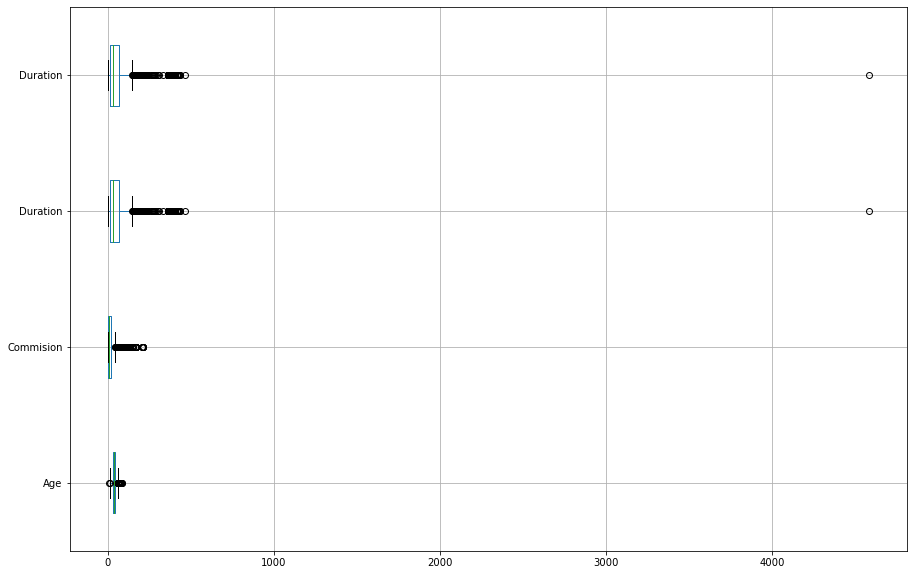

In [42]:
## Checking for Outliers
# construct box plot for continuous variables
plt.figure(figsize=(15,10))
df[['Age', 'Commision', 'Duration', 'Duration']].boxplot(vert=0)

In [43]:
## Converting all objects to categorical codes

In [44]:
for feature in df.columns: 
    if df[feature].dtype == 'object': 
        print('\n')
        print('feature:',feature)
        print(pd.Categorical(df[feature].unique()))
        print(pd.Categorical(df[feature].unique()).codes)
        df[feature] = pd.Categorical(df[feature]).codes



feature: Agency_Code
['C2B', 'EPX', 'CWT', 'JZI']
Categories (4, object): ['C2B', 'CWT', 'EPX', 'JZI']
[0 2 1 3]


feature: Type
['Airlines', 'Travel Agency']
Categories (2, object): ['Airlines', 'Travel Agency']
[0 1]


feature: Claimed
['No', 'Yes']
Categories (2, object): ['No', 'Yes']
[0 1]


feature: Channel
['Online', 'Offline']
Categories (2, object): ['Offline', 'Online']
[1 0]


feature: Product_Name
['Customised Plan', 'Cancellation Plan', 'Bronze Plan', 'Silver Plan', 'Gold Plan']
Categories (5, object): ['Bronze Plan', 'Cancellation Plan', 'Customised Plan', 'Gold Plan', 'Silver Plan']
[2 1 0 4 3]


feature: Destination
['ASIA', 'Americas', 'EUROPE']
Categories (3, object): ['ASIA', 'Americas', 'EUROPE']
[0 1 2]


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2861 entries, 0 to 2999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           2861 non-null   int64  
 1   Agency_Code   2861 non-null   int8   
 2   Type          2861 non-null   int8   
 3   Claimed       2861 non-null   int8   
 4   Commision     2861 non-null   float64
 5   Channel       2861 non-null   int8   
 6   Duration      2861 non-null   int64  
 7   Sales         2861 non-null   float64
 8   Product_Name  2861 non-null   int8   
 9   Destination   2861 non-null   int8   
dtypes: float64(2), int64(2), int8(6)
memory usage: 128.5 KB


In [46]:
df.head()

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product_Name,Destination
0,48,0,0,0,0.70,1,7,2.51,2,0
1,36,2,1,0,0.00,1,34,20.00,2,0
2,39,1,1,0,5.94,1,3,9.90,2,1
3,36,2,1,0,0.00,1,4,26.00,1,0
4,33,3,0,0,6.30,1,53,18.00,0,0


In [48]:
df.Claimed.value_counts(normalize=True)

0    0.680531
1    0.319469
Name: Claimed, dtype: float64

In [49]:
#There is no issue of class imbalance here as we have reasonable proportions in both the classes

## Extracting the target column into separate vectors for training set and test set

In [50]:
X = df.drop("Claimed", axis=1)

y = df.pop("Claimed")

X.head()

,Age,Agency_Code,Type,Commision,Channel,Duration,Sales,Product_Name,Destination
0,48,0,0,0.70,1,7,2.51,2,0
1,36,2,1,0.00,1,34,20.00,2,0
2,39,1,1,5.94,1,3,9.90,2,1
3,36,2,1,0.00,1,4,26.00,1,0
4,33,3,0,6.30,1,53,18.00,0,0


## Splitting data into training and test set

In [51]:
from sklearn.model_selection import train_test_split

X_train, X_test, train_labels, test_labels = train_test_split(X, y, test_size=.30, random_state=1)

## Checking the dimensions of the training and test data

In [52]:
print('X_train',X_train.shape)
print('X_test',X_test.shape)
print('train_labels',train_labels.shape)
print('test_labels',test_labels.shape)

X_train (2002, 9)
X_test (859, 9)
train_labels (2002,)
test_labels (859,)


# Building a Decision Tree Classifier

In [53]:
param_grid = {
    'criterion': ['gini'],
    'max_depth': [10,20,30,50],
    'min_samples_leaf': [50,100,150], 
    'min_samples_split': [150,300,450],
}

dtcl = DecisionTreeClassifier(random_state=1)

grid_search = GridSearchCV(estimator = dtcl, param_grid = param_grid, cv = 10)

In [54]:
grid_search.fit(X_train, train_labels)
print(grid_search.best_params_)
best_grid = grid_search.best_estimator_
best_grid

{'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 50, 'min_samples_split': 300}


DecisionTreeClassifier(max_depth=10, min_samples_leaf=50, min_samples_split=300,
                       random_state=1)

## Generating Tree

In [55]:
train_char_label = ['no', 'yes']
tree_regularized = open('tree_regularized.dot','w')
dot_data = tree.export_graphviz(best_grid, out_file= tree_regularized , feature_names = list(X_train), class_names = list(train_char_label))

tree_regularized.close()
dot_data

## Variable Importance

In [56]:
print (pd.DataFrame(best_grid.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values('Imp',ascending=False))

                   Imp
Agency_Code   0.600450
Sales         0.304966
Product_Name  0.047357
Duration      0.018764
Commision     0.014732
Age           0.013731
Type          0.000000
Channel       0.000000
Destination   0.000000


## Predicting on Training and Test dataset

In [57]:
ytrain_predict = best_grid.predict(X_train)
ytest_predict = best_grid.predict(X_test)

## Getting the Predicted Classes and Probs


In [58]:
ytest_predict
ytest_predict_prob=best_grid.predict_proba(X_test)
ytest_predict_prob
pd.DataFrame(ytest_predict_prob).head()

,0,1
0,0.573171,0.426829
1,0.971223,0.028777
2,0.232975,0.767025
3,0.837500,0.162500
4,0.837500,0.162500


## Model Evaluation

### AUC and ROC for the training data


AUC: 0.810


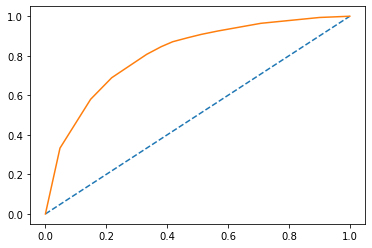

In [60]:
# predict probabilities
probs = best_grid.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
cart_train_auc = roc_auc_score(train_labels, probs)
print('AUC: %.3f' % cart_train_auc)
# calculate roc curve
cart_train_fpr, cart_train_tpr, cart_train_thresholds = roc_curve(train_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(cart_train_fpr, cart_train_tpr)

### AUC and ROC for the test data

AUC: 0.792


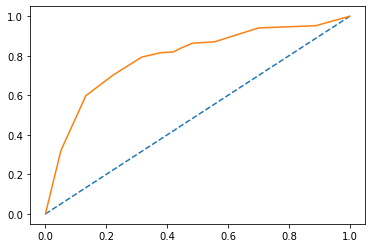

In [61]:
# predict probabilities
probs = best_grid.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
cart_test_auc = roc_auc_score(test_labels, probs)
print('AUC: %.3f' % cart_test_auc)
# calculate roc curve
cart_test_fpr, cart_test_tpr, cart_testthresholds = roc_curve(test_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(cart_test_fpr, cart_test_tpr)

### Confusion Matrix for the training data


In [62]:
confusion_matrix(train_labels, ytrain_predict)

array([[1157,  202],
       [ 270,  373]], dtype=int64)

In [63]:
#Train Data Accuracy
cart_train_acc=best_grid.score(X_train,train_labels) 
cart_train_acc

0.7642357642357642

In [64]:
print(classification_report(train_labels, ytrain_predict))

              precision    recall  f1-score   support

           0       0.81      0.85      0.83      1359
           1       0.65      0.58      0.61       643

    accuracy                           0.76      2002
   macro avg       0.73      0.72      0.72      2002
weighted avg       0.76      0.76      0.76      2002



In [65]:
cart_metrics=classification_report(train_labels, ytrain_predict,output_dict=True)
df=pd.DataFrame(cart_metrics).transpose()
cart_train_f1=round(df.loc["1"][2],2)
cart_train_recall=round(df.loc["1"][1],2)
cart_train_precision=round(df.loc["1"][0],2)
print ('cart_train_precision ',cart_train_precision)
print ('cart_train_recall ',cart_train_recall)
print ('cart_train_f1 ',cart_train_f1)

cart_train_precision  0.65
cart_train_recall  0.58
cart_train_f1  0.61


### Confusion Matrix for test data

In [66]:
confusion_matrix(test_labels, ytest_predict)

array([[510,  78],
       [109, 162]], dtype=int64)

In [67]:
#Test Data Accuracy
cart_test_acc=best_grid.score(X_test,test_labels)
cart_test_acc

0.7823050058207218

In [68]:
print(classification_report(test_labels, ytest_predict))

              precision    recall  f1-score   support

           0       0.82      0.87      0.85       588
           1       0.68      0.60      0.63       271

    accuracy                           0.78       859
   macro avg       0.75      0.73      0.74       859
weighted avg       0.78      0.78      0.78       859



In [69]:
cart_metrics=classification_report(test_labels, ytest_predict,output_dict=True)
df=pd.DataFrame(cart_metrics).transpose()
cart_test_precision=round(df.loc["1"][0],2)
cart_test_recall=round(df.loc["1"][1],2)
cart_test_f1=round(df.loc["1"][2],2)
print ('cart_test_precision ',cart_test_precision)
print ('cart_test_recall ',cart_test_recall)
print ('cart_test_f1 ',cart_test_f1)

cart_test_precision  0.68
cart_test_recall  0.6
cart_test_f1  0.63


# Cart Conclusion


Train Data:
AUC: 81%
Accuracy: 76%
Precision: 65%
f1-Score: 61%

Test Data:
AUC: 79%
Accuracy: 78%
Precision: 68%
f1-Score: 63%

  
Agency_Code is the most important variable for predicting Claimed

# Building a Random Forest Classifier

In [71]:
### Grid Search for finding out the optimal values for the hyper parameters

param_grid = {
    'max_depth': [10],## 20,30,40
    'max_features': [6],## 7,8,9
    'min_samples_leaf': [10],## 50,100
    'min_samples_split': [50], ## 60,70
    'n_estimators': [300] ## 100,200
}

rfcl = RandomForestClassifier(random_state=1)

grid_search = GridSearchCV(estimator = rfcl, param_grid = param_grid, cv = 5)

In [72]:
grid_search.fit(X_train, train_labels)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=1),
             param_grid={'max_depth': [10], 'max_features': [6],
                         'min_samples_leaf': [10], 'min_samples_split': [50],
                         'n_estimators': [300]})

In [73]:
grid_search.best_params_


{'max_depth': 10,
 'max_features': 6,
 'min_samples_leaf': 10,
 'min_samples_split': 50,
 'n_estimators': 300}

In [77]:
best_grid = grid_search.best_estimator_

In [78]:
best_grid

RandomForestClassifier(max_depth=20, max_features=9, min_samples_leaf=40,
                       min_samples_split=70, random_state=1)

## Predicting the Training and Testing data

In [79]:
ytrain_predict = best_grid.predict(X_train)
ytest_predict = best_grid.predict(X_test)

## RF Model Performance Evaluation on Training data

In [80]:
confusion_matrix(train_labels,ytrain_predict)

array([[1191,  168],
       [ 269,  374]], dtype=int64)

In [81]:
rf_train_acc=best_grid.score(X_train,train_labels) 
rf_train_acc

0.7817182817182817

In [82]:
print(classification_report(train_labels,ytrain_predict))

              precision    recall  f1-score   support

           0       0.82      0.88      0.84      1359
           1       0.69      0.58      0.63       643

    accuracy                           0.78      2002
   macro avg       0.75      0.73      0.74      2002
weighted avg       0.78      0.78      0.78      2002



In [83]:
rf_metrics=classification_report(train_labels, ytrain_predict,output_dict=True)
df=pd.DataFrame(rf_metrics).transpose()
rf_train_precision=round(df.loc["1"][0],2)
rf_train_recall=round(df.loc["1"][1],2)
rf_train_f1=round(df.loc["1"][2],2)
print ('rf_train_precision ',rf_train_precision)
print ('rf_train_recall ',rf_train_recall)
print ('rf_train_f1 ',rf_train_f1)

rf_train_precision  0.69
rf_train_recall  0.58
rf_train_f1  0.63


Area under Curve is 0.8334466267736431


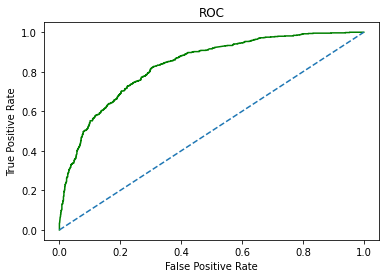

In [84]:
rf_train_fpr, rf_train_tpr,_=roc_curve(train_labels,best_grid.predict_proba(X_train)[:,1])
plt.plot(rf_train_fpr,rf_train_tpr,color='green')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
rf_train_auc=roc_auc_score(train_labels,best_grid.predict_proba(X_train)[:,1])
print('Area under Curve is', rf_train_auc)

## RF Model Performance Evaluation on Test data

In [85]:
confusion_matrix(test_labels,ytest_predict)

array([[513,  75],
       [115, 156]], dtype=int64)

In [86]:
rf_test_acc=best_grid.score(X_test,test_labels)
rf_test_acc

0.7788125727590222

In [87]:
print(classification_report(test_labels,ytest_predict))

              precision    recall  f1-score   support

           0       0.82      0.87      0.84       588
           1       0.68      0.58      0.62       271

    accuracy                           0.78       859
   macro avg       0.75      0.72      0.73       859
weighted avg       0.77      0.78      0.77       859



In [88]:
rf_metrics=classification_report(test_labels, ytest_predict,output_dict=True)
df=pd.DataFrame(rf_metrics).transpose()
rf_test_precision=round(df.loc["1"][0],2)
rf_test_recall=round(df.loc["1"][1],2)
rf_test_f1=round(df.loc["1"][2],2)
print ('rf_test_precision ',rf_test_precision)
print ('rf_test_recall ',rf_test_recall)
print ('rf_test_f1 ',rf_test_f1)

rf_test_precision  0.68
rf_test_recall  0.58
rf_test_f1  0.62


Area under Curve is 0.8056266787157668


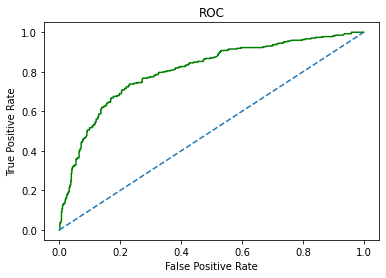

In [89]:
rf_test_fpr, rf_test_tpr,_=roc_curve(test_labels,best_grid.predict_proba(X_test)[:,1])
plt.plot(rf_test_fpr,rf_test_tpr,color='green')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
rf_test_auc=roc_auc_score(test_labels,best_grid.predict_proba(X_test)[:,1])
print('Area under Curve is', rf_test_auc)

In [90]:
# Variable Importance
print (pd.DataFrame(best_grid.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values('Imp',ascending=False))

                   Imp
Agency_Code   0.495768
Sales         0.269925
Product_Name  0.100750
Duration      0.064652
Commision     0.040616
Age           0.026388
Destination   0.001692
Type          0.000209
Channel       0.000000


# Random Forest Conclusion

<b>Train Data:</b>  
    AUC: 83%        
    Accuracy: 78%           
    Precision: 69%        
    f1-Score: 63%       
            
<b>Test Data:</b>      
    AUC: 80%      
    Accuracy: 78%          
    Precision: 68%       
    f1-Score: 62%     
  
Training and Test set results are almost similar, the model is a decent model.  
  
Agency_Code is again the most important variable for predicting Claim status

# Building a Neural Network Classifier


In [95]:
param_grid = {
    'hidden_layer_sizes': [50], # 50, 200
    'max_iter': [2500], #5000,2500
    'solver': ['adam'], #sgd
    'tol': [0.01], 
}

nncl = MLPClassifier(random_state=1)

grid_search = GridSearchCV(estimator = nncl, param_grid = param_grid, cv = 10)

In [96]:
grid_search.fit(X_train, train_labels)
grid_search.best_params_

{'hidden_layer_sizes': 50, 'max_iter': 2500, 'solver': 'adam', 'tol': 0.01}

In [97]:
best_grid = grid_search.best_estimator_
best_grid

MLPClassifier(hidden_layer_sizes=50, max_iter=2500, random_state=1, tol=0.01)

## Predicting the Training and Testing data


In [98]:
ytrain_predict = best_grid.predict(X_train)
ytest_predict = best_grid.predict(X_test)

## NN Model Performance Evaluation on Training data

In [99]:
confusion_matrix(train_labels,ytrain_predict)

array([[1292,   67],
       [ 437,  206]], dtype=int64)

In [100]:
nn_train_acc=best_grid.score(X_train,train_labels) 
nn_train_acc

0.7482517482517482

In [101]:
print(classification_report(train_labels,ytrain_predict))

              precision    recall  f1-score   support

           0       0.75      0.95      0.84      1359
           1       0.75      0.32      0.45       643

    accuracy                           0.75      2002
   macro avg       0.75      0.64      0.64      2002
weighted avg       0.75      0.75      0.71      2002



In [102]:
nn_metrics=classification_report(train_labels, ytrain_predict,output_dict=True)
df=pd.DataFrame(nn_metrics).transpose()
nn_train_precision=round(df.loc["1"][0],2)
nn_train_recall=round(df.loc["1"][1],2)
nn_train_f1=round(df.loc["1"][2],2)
print ('nn_train_precision ',nn_train_precision)
print ('nn_train_recall ',nn_train_recall)
print ('nn_train_f1 ',nn_train_f1)

nn_train_precision  0.75
nn_train_recall  0.32
nn_train_f1  0.45


Area under Curve is 0.7597921580340499


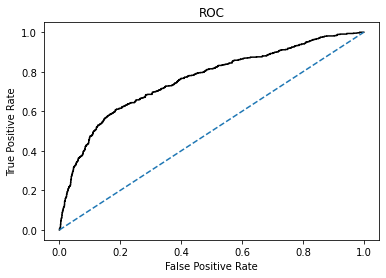

In [103]:
nn_train_fpr, nn_train_tpr,_=roc_curve(train_labels,best_grid.predict_proba(X_train)[:,1])
plt.plot(nn_train_fpr,nn_train_tpr,color='black')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
nn_train_auc=roc_auc_score(train_labels,best_grid.predict_proba(X_train)[:,1])
print('Area under Curve is', nn_train_auc)

## NN Model Performance Evaluation on Test data

In [104]:
confusion_matrix(test_labels,ytest_predict)

array([[554,  34],
       [197,  74]], dtype=int64)

In [105]:
nn_test_acc=best_grid.score(X_test,test_labels)
nn_test_acc

0.7310826542491269

In [106]:
print(classification_report(test_labels,ytest_predict))

              precision    recall  f1-score   support

           0       0.74      0.94      0.83       588
           1       0.69      0.27      0.39       271

    accuracy                           0.73       859
   macro avg       0.71      0.61      0.61       859
weighted avg       0.72      0.73      0.69       859



In [107]:
nn_metrics=classification_report(test_labels, ytest_predict,output_dict=True)
df=pd.DataFrame(nn_metrics).transpose()
nn_test_precision=round(df.loc["1"][0],2)
nn_test_recall=round(df.loc["1"][1],2)
nn_test_f1=round(df.loc["1"][2],2)
print ('nn_test_precision ',nn_test_precision)
print ('nn_test_recall ',nn_test_recall)
print ('nn_test_f1 ',nn_test_f1)

nn_test_precision  0.69
nn_test_recall  0.27
nn_test_f1  0.39


Area under Curve is 0.7485440670733237


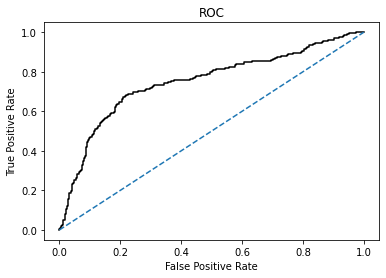

In [108]:
nn_test_fpr, nn_test_tpr,_=roc_curve(test_labels,best_grid.predict_proba(X_test)[:,1])
plt.plot(nn_test_fpr,nn_test_tpr,color='black')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
nn_test_auc=roc_auc_score(test_labels,best_grid.predict_proba(X_test)[:,1])
print('Area under Curve is', nn_test_auc)

In [109]:
best_grid.score

<bound method ClassifierMixin.score of MLPClassifier(hidden_layer_sizes=50, max_iter=2500, random_state=1, tol=0.01)>

# Neural Network Conclusion


Train Data:
AUC: 76%
Accuracy: 75%
Precision: 75%
f1-Score: 45%

Test Data:
AUC: 75%
Accuracy: 73%
Precision: 69%
f1-Score: 39%



# Final Conclusion


## Comparison of the performance metrics from the 3 models

In [110]:
index=['Accuracy', 'AUC', 'Recall','Precision','F1 Score']
data = pd.DataFrame({'CART Train':[cart_train_acc,cart_train_auc,cart_train_recall,cart_train_precision,cart_train_f1],
        'CART Test':[cart_test_acc,cart_test_auc,cart_test_recall,cart_test_precision,cart_test_f1],
       'Random Forest Train':[rf_train_acc,rf_train_auc,rf_train_recall,rf_train_precision,rf_train_f1],
        'Random Forest Test':[rf_test_acc,rf_test_auc,rf_test_recall,rf_test_precision,rf_test_f1],
       'Neural Network Train':[nn_train_acc,nn_train_auc,nn_train_recall,nn_train_precision,nn_train_f1],
        'Neural Network Test':[nn_test_acc,nn_test_auc,nn_test_recall,nn_test_precision,nn_test_f1]},index=index)
round(data,2)

,CART Train,CART Test,Random Forest Train,Random Forest Test,Neural Network Train,Neural Network Test
Accuracy,0.76,0.78,0.78,0.78,0.75,0.73
AUC,0.81,0.79,0.83,0.81,0.76,0.75
Recall,0.58,0.60,0.58,0.58,0.32,0.27
Precision,0.65,0.68,0.69,0.68,0.75,0.69
F1 Score,0.61,0.63,0.63,0.62,0.45,0.39


## ROC Curve for the 3 models on the Training data

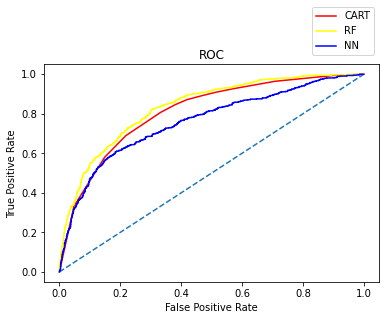

In [113]:
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(cart_train_fpr, cart_train_tpr,color='red',label="CART")
plt.plot(rf_train_fpr,rf_train_tpr,color='yellow',label="RF")
plt.plot(nn_train_fpr,nn_train_tpr,color='blue',label="NN")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower right')

## ROC Curve for the 3 models on the Test data

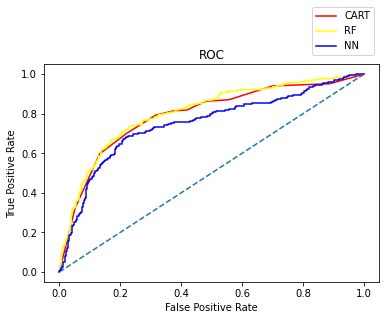

In [114]:
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(cart_test_fpr, cart_test_tpr,color='Red',label="CART")
plt.plot(rf_test_fpr,rf_test_tpr,color='yellow',label="RF")
plt.plot(nn_test_fpr,nn_test_tpr,color='blue',label="NN")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower right')

Out of the 3 models, Random Forest has slightly better performance than the Cart and Neural network model

Overall all the 3 models are reasonaly stable enough to be used for making any future predictions. From Cart and Random Forest Model, the variable Agency_Name is found to be the most useful feature amongst all other features for predicting if a person will claim the insurance or not.